<img src="https://shrug-assets-ddl.s3.amazonaws.com/static/main/assets/img/ddl_logo.png">
<hr>

# Geospatial Fundamentals Tech Talk

* Cover a lot of the basics, including
    * A walk through the glossary
    * Coordinate systems, projections, geodesy
    * Raster vs Vector
    * Measurements – extractions, distances
    
_October 6, 2021_

Then transition into some of the tools DDL uses (and has developed) to make geospatial analysis easier.

🐍 _warning - we are about to enter Python land_ 🐍

# Terms

* Spatial Reference System
   * Geoid
   * Ellipsoid
   * Datum
   * Projection
* Coordinate Reference System

# Spatial Reference System

A representation of any location on the earth. Includes:
* Geoid
* Ellipsoid
* Datum
* Projection

**Often denoted by an EPSG number, e.g. EPSG:4326**

# The Geoid

The reference surface of the earth for a Spatial Reference System. But...

Earth isn't spherical  
How do you flatten peaks and valleys?  
What actually is the "center of the earth"?  
"Sea level" is not uniform.  

Enter Gauss - _the geoid_ is the equipotential surface where the gravity field of the earth is constant.

# The Geoid

<img src="https://www.researchgate.net/profile/Ales-Bezdek/publication/256938953/figure/fig1/AS:614122672640022@1523429663891/Geoid-height-computed-from-the-gravity-field-model-EGM2008-Pavlis-et-al-2012.png">

# The Ellipsoid

Earth is best approximated as an "oblate spheroid" - think clementines. But different ellipsoids fit the geoid better in certain areas of the earth, so SRSs utilize different ellipsoids.

<img src="http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Datums/Components%20of%20a%20datum_files/image003.gif">

# The Datum

The anchor point of the ellipsoid on the earth.

<img src="http://www.geo.hunter.cuny.edu/~jochen/gtech201/lectures/lec6concepts/Datums/Components%20of%20a%20datum_files/image004.gif">

# Projection

Projection is the act of squashing a three dimensional representation of the earth down to two dimensions. 

<img src="https://gistbok.ucgis.org/sites/default/files/figure2-projections.png" width="500">

# Wait, I thought it was CRS, not SRS!

Some people say that the "coordinate reference system" is the same as a "spatial reference system" - but technically, the CRS is the constructed grid that allows you to pick a point within your SRS. _i.e._ the CRS is lat / lon (also called the _geodetic coordinate system_ ). But whatever, other people will use CRS to mean SRS, so it goes.

# On to the fun stuff - actual data!

Let's take a look at our district shapefile. How do we read it in? What's the SRS?

In [1]:
# geopandas: this is the way
import geopandas as gpd
from ddlpy.utils.constants import IEC1

# Filepath to the ML Infomap district polygons
fpv = IEC1 / "gis/pc11/pc11-district-simplified.shp"

# Read in the shapefile
dist = gpd.read_file(fpv)

# show the crs (srs?)
print(dist.crs)

epsg:4326


# Sidebar - what the heck is WGS84?

* WGS84 is the same thing as EPSG:4326
* WGS84 is the standard upon which GPS is built
* WGS84 is an _unprojected_ geodetic reference system! WGS84 is not a projection.
* Sometimes referred to as a geography data type, not a geometry (which is projected)

# Why do we care if WGS84 is projected?

Calculating distances in projected two-dimensional space is super easy - thanks to Pythagoras.
Calculating distances in geodetic space is harder. Areas much much harder.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/cb/Illustration_of_great-circle_distance.svg/1200px-Illustration_of_great-circle_distance.svg.png" width="500">

# Projections - what do they actually look like?

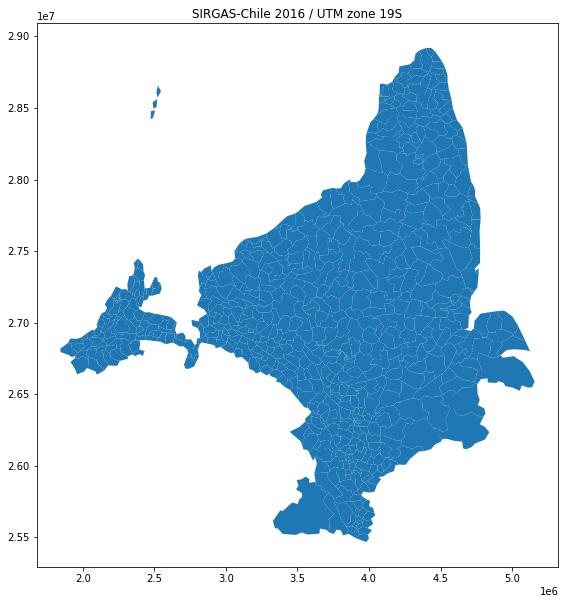

In [3]:
#ax = dist.plot(figsize=(15, 10))
#ax.set_title("WGS84");
dist_web = dist.to_crs("EPSG:9155")
ax = dist_web.plot(figsize=(15, 10))
ax.set_title("SIRGAS-Chile 2016 / UTM zone 19S");

# SRS and projections matter!

# OK - what about Raster vs. Vector?

* Vector data is like the district boundaries, or text in a LaTeX PDF - the image doesn't degrade no matter how much you zoom.
* Rasters are grids of cells - like the pixels on your computer monitor.

<img src="https://carpentries-incubator.github.io/geospatial-python/fig/dc-spatial-raster/raster_resolution.png" width="1200">

Thanks to [The Carpentries Incubator](https://carpentries-incubator.github.io/geospatial-python/aio/index.html) for images

# Raster Bands

<img src="https://carpentries-incubator.github.io/geospatial-python/fig/dc-spatial-raster/RGBSTack_1.jpg" width="1200">

# Manipulating rasters in Python
We'll use irrigated wheat cropping potential GAEZ data as an example. 

In [4]:
# rasterio: this is the way
import rasterio
from ddlpy.utils.constants import IEC

# Filepath to the ML Infomap district polygons
fpr = IEC / "ag/gaez/raw/high-rain-fed/wheat/data.asc"

# Read in the shapefile (this is an ASCII raster, with a .prj projection file)
wheat = rasterio.open(fpr)
print(wheat.crs)

EPSG:4326


# More introspection in `rasterio`

And you can also use `gdalinfo` from the command line! 

In [5]:
layers = {i: dtype for i, dtype in zip(wheat.indexes, wheat.dtypes)}
print(f'Bounding box: {wheat.bounds}')
print(f'Layer indices and data types: {layers}')

Bounding box: BoundingBox(left=-180.0, bottom=-89.916666666667, right=179.916666665227, top=83.749999999305)
Layer indices and data types: {1: 'float32'}


In [6]:
# raster bands are just matrices
band1 = wheat.read(1)
band1

array([[-9.e+00, -9.e+00, -9.e+00, ..., -9.e+00, -9.e+00, -9.e+00],
       [-9.e+00, -9.e+00, -9.e+00, ..., -9.e+00, -9.e+00, -9.e+00],
       [-9.e+00, -9.e+00, -9.e+00, ..., -9.e+00, -9.e+00, -9.e+00],
       ...,
       [-9.e-03, -9.e-03, -9.e-03, ..., -9.e-03, -9.e-03, -9.e-03],
       [-9.e-03, -9.e-03, -9.e-03, ..., -9.e-03, -9.e-03, -9.e-03],
       [-9.e-03, -9.e-03, -9.e-03, ..., -9.e-03, -9.e-03, -9.e-03]],
      dtype=float32)

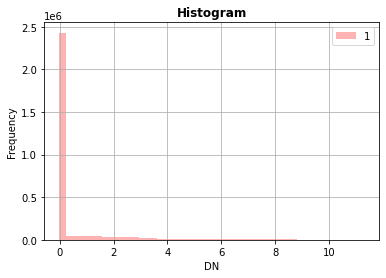

In [7]:
from rasterio.plot import show_hist
show_hist(
    wheat, bins=50, lw=0.0, stacked=False, alpha=0.3,
    histtype='stepfilled', title="Histogram")

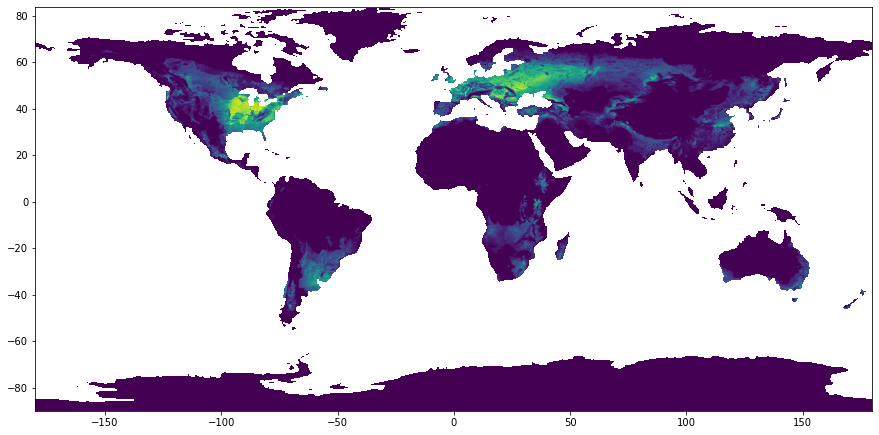

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
rasterio.plot.show(wheat, ax=ax)

# Combining raster and vector

What if we only care about 🌾 cropping potential for India?

In [9]:
# mask the raster to indian districts
from rasterio.mask import mask
masked_raster, masked_raster_transform = rasterio.mask.mask(wheat, dist[['geometry']].values.flatten())

# get bounds for zooming when we plot
d_bounds = dist.geometry.total_bounds
xlim = ([d_bounds[0],  d_bounds[2]])
ylim = ([d_bounds[1],  d_bounds[3]])

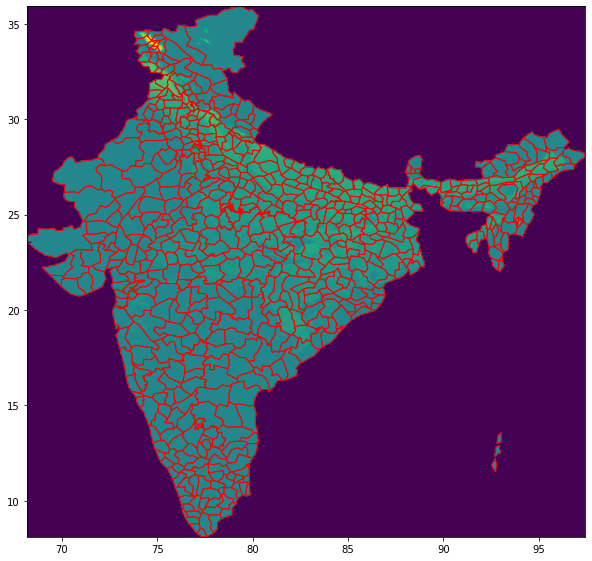

In [10]:
# prepare the plot canvas and render
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlim(xlim)
ax.set_ylim(ylim)
rasterio.plot.show(masked_raster, transform=masked_raster_transform, ax=ax)
dist.plot(ax=ax, facecolor='none', edgecolor='r');

# Raster extraction

Major use case - aggregating raster values to construct statistics for each polygon  
...enter `ddlpy/geospatialtools` subpackage

In [11]:
# utilize DDL extract_raster function
from ddlpy.geospatialtools import geospatialtools
extracted = geospatialtools.extract_raster(fp_poly=dist, id_poly='pc11_d_id', fp_raster=str(fpr))

ensure that you're using conda environment py_spatial


/dartfs-hpc/rc/home/j/d16366j/ddl/tools/py/ddlpy/geospatialtools/utils.py:135: UserWarning: 2 polygons are invalid, applying .buffer(0) correction.
  UserWarning
/dartfs-hpc/rc/home/j/d16366j/ddl/tools/py/ddlpy/geospatialtools/utils.py:139: UserWarning: Corrected corrupt polygons indices: [485, 556]
  UserWarning


Raster extraction beginning... 12:30:06
Running general zonal_stats raster extraction on 99 polygons...
General zonal_stats raster extraction complete.
Running precision pixel area weighted vectorization on 535 polygons...
Finished running precision vector extraction.
Raster extraction to vector data is finished... 12:30:15


In [12]:
extracted.tail()

,pc11_d_id,min,max,mean,count,sum,pixelcount
629,640,0.000,0.000,0.000000,36,0.000,14.419987
630,031,0.078,4.302,0.870483,64,34.052,27.329425
631,033,0.000,1.234,0.103857,192,6.758,71.027881
632,415,0.000,1.803,0.512641,110,20.233,55.602575
633,315,0.021,1.963,0.644272,132,33.291,66.281566


# What about points?

Example: quantifying access of mineral deposits to the railway network

In [13]:
# let's take a look at the data. first import to geodataframe
from ddlpy.geospatialtools import utils
mines = utils.import_vector_data('~/iec1/minec_new/minec_atlas_clean.dta', lat='latitude', lon='longitude')
railroads = gpd.read_file(IEC1 / 'gis/railroads/railways.shp')

/dartfs-hpc/rc/home/j/d16366j/ddl/tools/py/ddlpy/geospatialtools/utils.py:81: UserWarning: Non-georeferenced data are assumed to be in CRS WGS84
  warnings.warn("Non-georeferenced data are assumed to be in CRS WGS84", UserWarning)


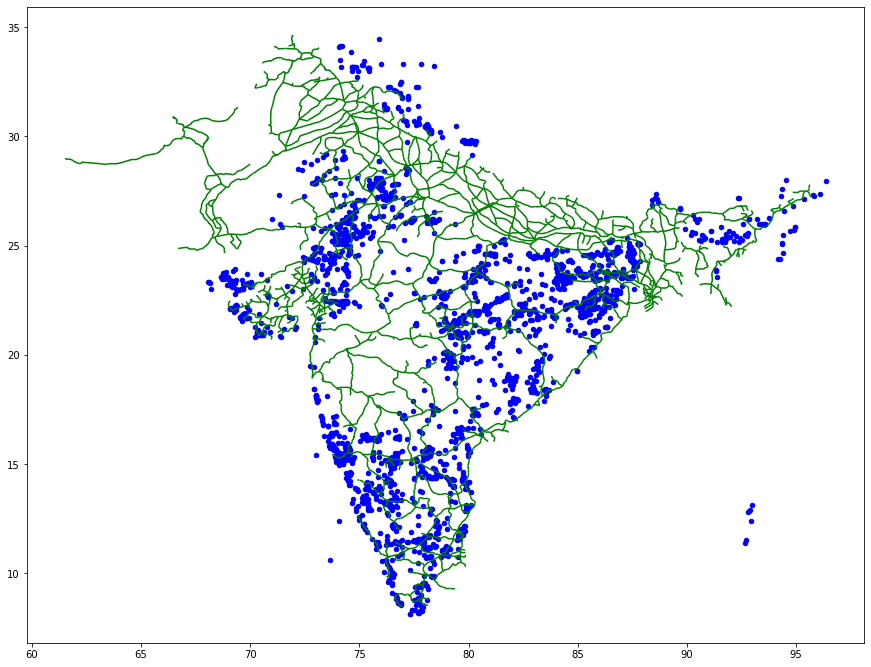

In [14]:
# plot
base=mines.plot(marker='o', color='blue', markersize=20, figsize=(15, 15))
railroads.plot(ax=base, color='green')
plt.show()

# How do you actually calculate the distances?
...Use the `ddlpy/geospatialtools` utility called `spatial_neighbor_distance`!

In [15]:
out = geospatialtools.spatial_neighbor_distance(fp_point='~/iec1/minec_new/minec_atlas_clean.dta', id_point='gsi_deposit_id', fp_nn='~/iec1/gis/railroads/railways.shp', id_nn='RRLINE_ID',
                          lat_point='latitude', lon_point='longitude')

ensure that you're using conda environment py_spatial


/dartfs-hpc/rc/home/j/d16366j/ddl/tools/py/ddlpy/geospatialtools/utils.py:81: UserWarning: Non-georeferenced data are assumed to be in CRS WGS84
  warnings.warn("Non-georeferenced data are assumed to be in CRS WGS84", UserWarning)
/dartfs-hpc/rc/home/j/d16366j/ddl/tools/py/ddlpy/geospatialtools/utils.py:53: UserWarning: Shapefile has no CRS, setting to WGS84. If this is incorrect, results will be incorrect
  UserWarning


nearest neighbor calculation beginning... 12:35:55
creating rtree spatial index... 12:35:55
rtree spatial index complete... 12:35:56
nearest neighbor calculation finished 12:36:18


# Output
Distances are in KM.

Under the hood, we use the Haversine great circle distances and force both layers to the unprojected WGS84 SRS. 

This is slower, but very long distances remain accurate, and the user does not need to select the correct projection which can be tricky.

The Rtree spatial index makes it fast enough for us (most of the time).

In [16]:
out.sort_values('RRLINE_ID1', ascending=False).head()

,gsi_deposit_id,nn_dist1,nn_lat1,nn_lon1,RRLINE_ID1
1492,1494.0,56.054316,25.168701,89.746277,8219
2511,2514.0,24.269018,25.819756,89.665444,5978
1688,1690.0,100.955567,24.657898,68.839478,3678
2525,2528.0,100.955567,24.657898,68.839478,3678
1084,1085.0,97.348830,24.657898,68.839478,3678


# We also have DDL utilities for:

* Joining points and polygons
* Area-weighted raster extractions (for comparatively large pixel size)
* Distances between sets of points

* **Speed and scale:** Spatial indexes and how they work, Polygonal simplification, DGGS
* **Other software:** QGIS, GDAL, ogr2ogr, PostGIS
* **Web maps:** Vector tiles, raster tiles, Mapbox slippy maps
    
<img src="https://camo.githubusercontent.com/f7f5bf27b4c68a710b434e3456c8c3406e7ae6258dba97b8af883756d9c46601/68747470733a2f2f692e696d6775722e636f6d2f475a57734338472e676966" width="500">

# The End!

<img src="https://static01.nyt.com/images/2021/10/06/multimedia/06xp-fattestbear/06xp-fattestbear-superJumbo.jpg?quality=90&auto=webp" width="600">